In [1]:
import os
import pickle
import logging 
from openmmtools.multistate import MultiStateReporter
import tqdm
import numpy as np

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
import matplotlib.transforms as transforms


## N501 14/147

### Load nc file

In [2]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/14/147/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'complex'
endstate = 0
aa = 'ASN'.lower()
length = '1ns'
with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)


In [3]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


DEBUG:openmmtools.multistate.multistatereporter:Initial checkpoint file automatically chosen as /data/chodera/zhangi/perses_benchmark/neq/14/147/147_complex_asn_1ns_checkpoint.nc
DEBUG:openmmtools.multistate.multistatereporter:checkpoint_interval != on-file checkpoint interval! Using on file analysis interval of 1.


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [4]:
states = range(12)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [5]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 1001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|████████████████████████████| 11/11 [00:29<00:00,  2.70s/it]


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: sc

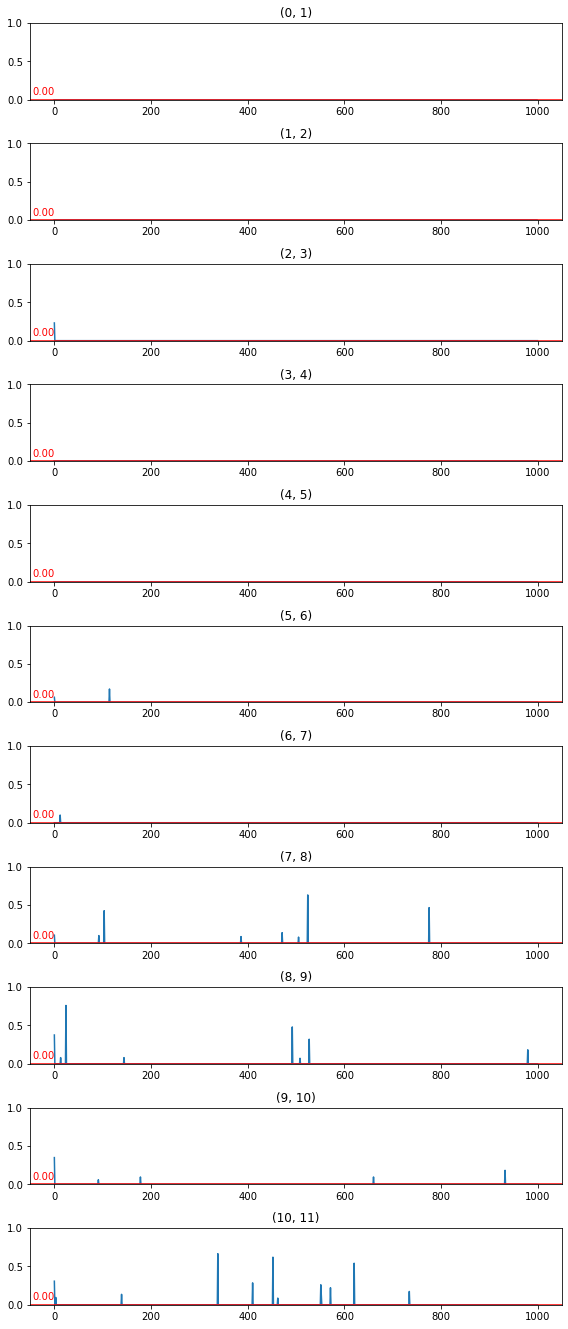

In [6]:
cols = 1
rows = 12
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Compute acceptance rates for all pairs of states involving state 0 across all iterations and plot

In [7]:
states = range(12)
state_neighbors = []
for first, second in zip([0]*12, states[1:]):
    state_neighbors.append((first, second))

In [8]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 1001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|████████████████████████████| 11/11 [00:33<00:00,  3.03s/it]


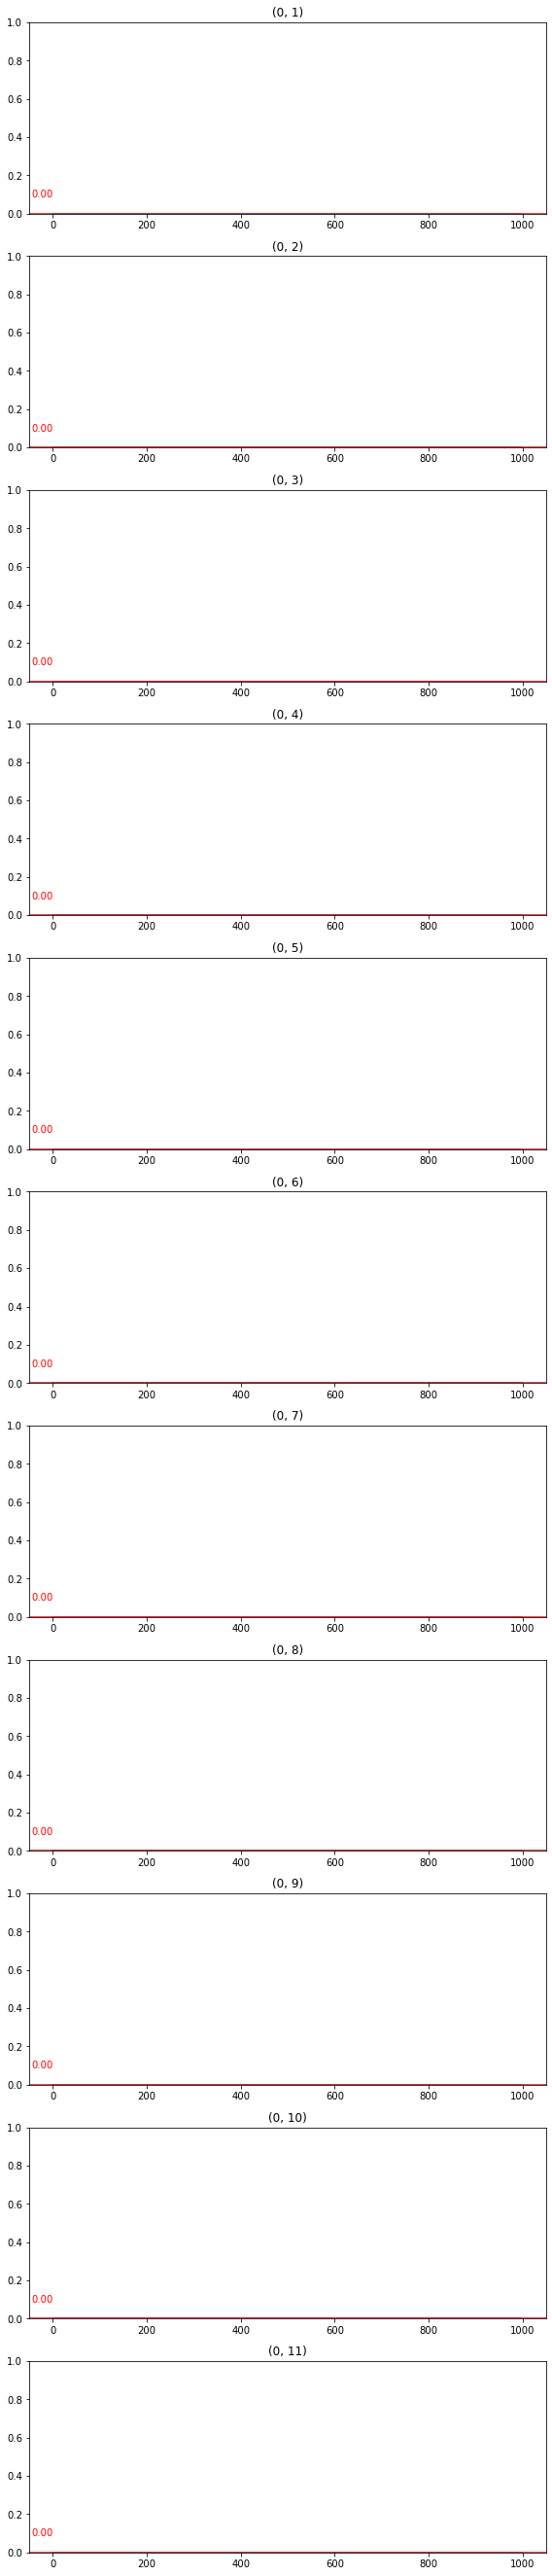

In [9]:
cols = 1
rows = 12
plt.figure(figsize=(8, 40))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")
#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Generate plots of temperature vs iteration for each of the 12 walkers

In [10]:
from perses.analysis.utils import open_netcdf
i = os.path.basename(os.path.dirname(out_dir))
nc = open_netcdf(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"))
nc_checkpoint = open_netcdf(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}_checkpoint.nc"))
checkpoint_interval = nc_checkpoint.CheckpointInterval
all_positions = nc_checkpoint.variables['positions']
n_iter, n_replicas, n_atoms, _ = np.shape(all_positions)



In [11]:
replica_trajs = []
for i in tqdm.tqdm(range(12)):
    replica_traj = []
    for iteration in range(n_iter):
        replica_traj.append(nc.variables['states'][iteration][i])
    replica_trajs.append(replica_traj)

100%|████████████████████████████| 12/12 [00:09<00:00,  1.24it/s]


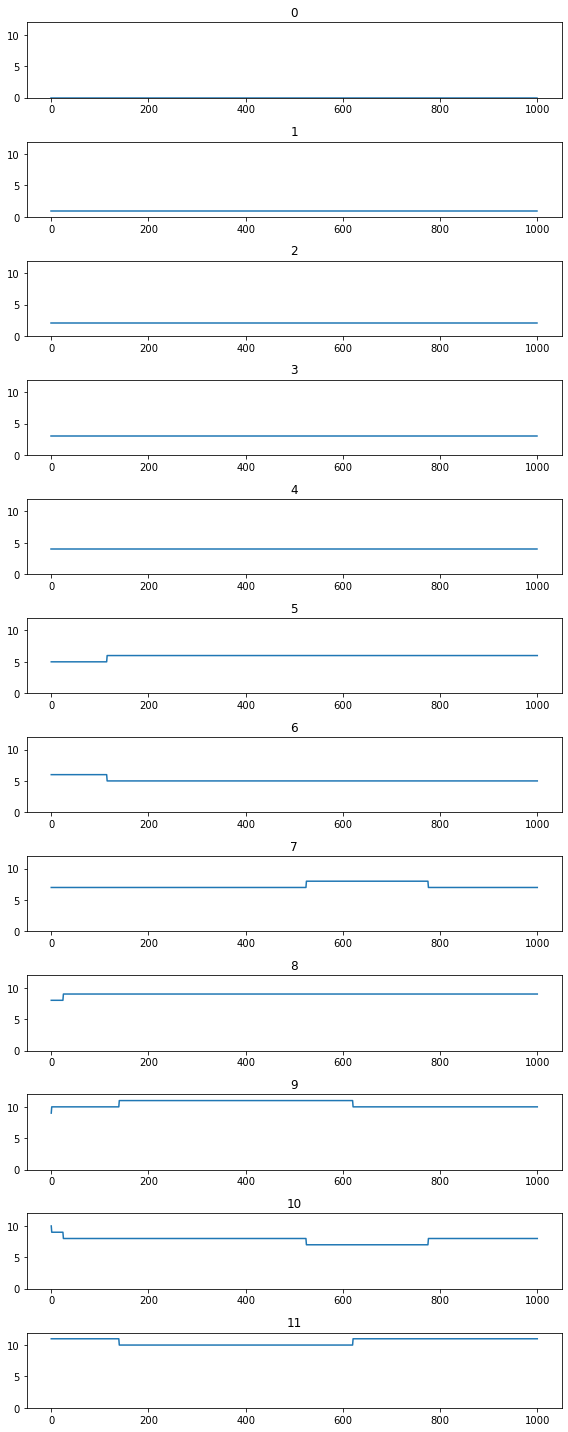

In [13]:
cols = 1
rows = 12
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, replica_traj in enumerate(replica_trajs):
    plt.subplot(gs[i,0])
    plt.plot(replica_traj)
    plt.title(i)
    plt.ylim([0, 12])

plt.tight_layout()
plt.show()

## N501 14/147 with 24 replicas

### Load nc file

In [2]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/14/147/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'complex'
endstate = 0
aa = 'ASN'.lower()
length = '1ns'
with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)


In [3]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


DEBUG:openmmtools.multistate.multistatereporter:Initial checkpoint file automatically chosen as /data/chodera/zhangi/perses_benchmark/neq/14/147/147_complex_asn_1ns_checkpoint.nc
DEBUG:openmmtools.multistate.multistatereporter:checkpoint_interval != on-file checkpoint interval! Using on file analysis interval of 1.


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [4]:
states = range(24)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [6]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 922):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████████████| 23/23 [00:32<00:00,  1.41s/it]


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: sc

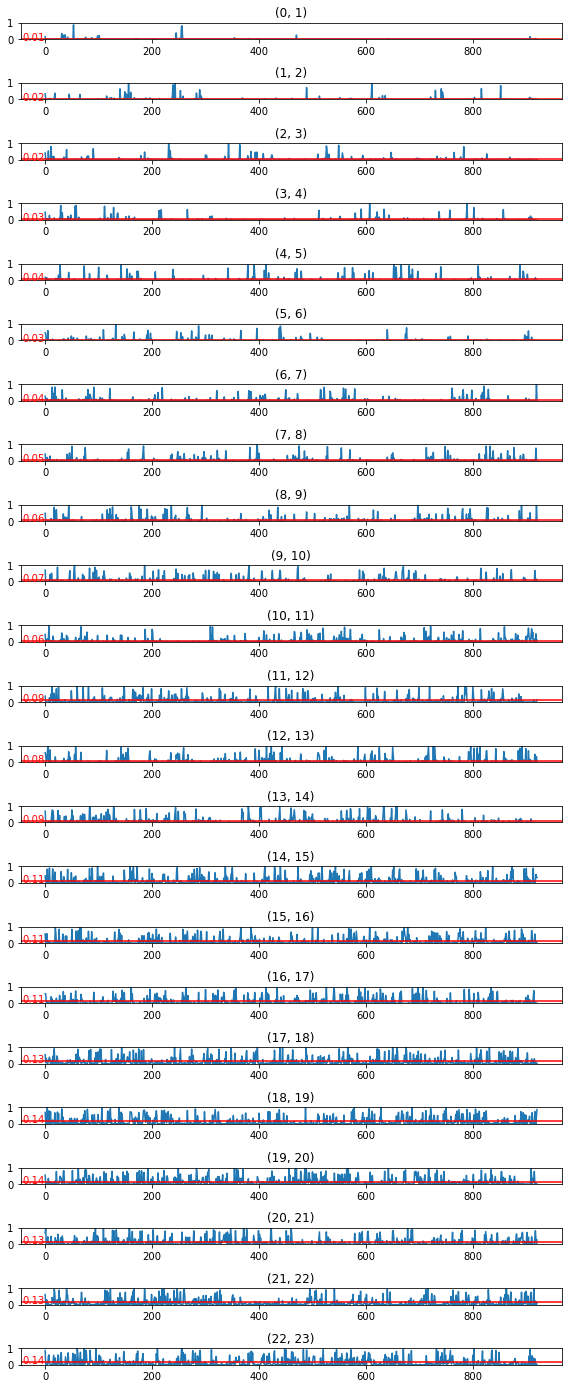

In [7]:
cols = 1
rows = 24
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Compute acceptance rates for all pairs of states involving state 0 across all iterations and plot

In [ ]:
states = range(24)
state_neighbors = []
for first, second in zip([0]*24, states[1:]):
    state_neighbors.append((first, second))

In [ ]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 1001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

In [ ]:
cols = 1
rows = 24
plt.figure(figsize=(8, 40))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")
#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Generate plots of temperature vs iteration for each of the 12 walkers

In [ ]:
from perses.analysis.utils import open_netcdf
i = os.path.basename(os.path.dirname(out_dir))
nc = open_netcdf(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"))
nc_checkpoint = open_netcdf(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}_checkpoint.nc"))
checkpoint_interval = nc_checkpoint.CheckpointInterval
all_positions = nc_checkpoint.variables['positions']
n_iter, n_replicas, n_atoms, _ = np.shape(all_positions)



In [ ]:
replica_trajs = []
for i in tqdm.tqdm(range(24)):
    replica_traj = []
    for iteration in range(n_iter):
        replica_traj.append(nc.variables['states'][iteration][i])
    replica_trajs.append(replica_traj)

In [ ]:
cols = 1
rows = 24
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, replica_traj in enumerate(replica_trajs):
    plt.subplot(gs[i,0])
    plt.plot(replica_traj)
    plt.title(i)
    plt.ylim([0, 12])

plt.tight_layout()
plt.show()

## N501 14/147 with 36 replicas

### Load nc file

In [4]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/14/147/"
i = 147
phase = 'complex'
endstate = 0
aa = 'ASN'.lower()
length = '1ns'
with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)


In [5]:
reporter = MultiStateReporter(os.path.join(out_dir, '36_replicas_working', f"{i}_{phase}_{aa}_{length}.nc"), 'r')


DEBUG:openmmtools.multistate.multistatereporter:Initial checkpoint file automatically chosen as /data/chodera/zhangi/perses_benchmark/neq/14/147/36_replicas_working/147_complex_asn_1ns_checkpoint.nc
DEBUG:openmmtools.multistate.multistatereporter:checkpoint_interval != on-file checkpoint interval! Using on file analysis interval of 1.


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [7]:
states = range(36)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [9]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 107):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|█| 35/35 [00:07<


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: sc

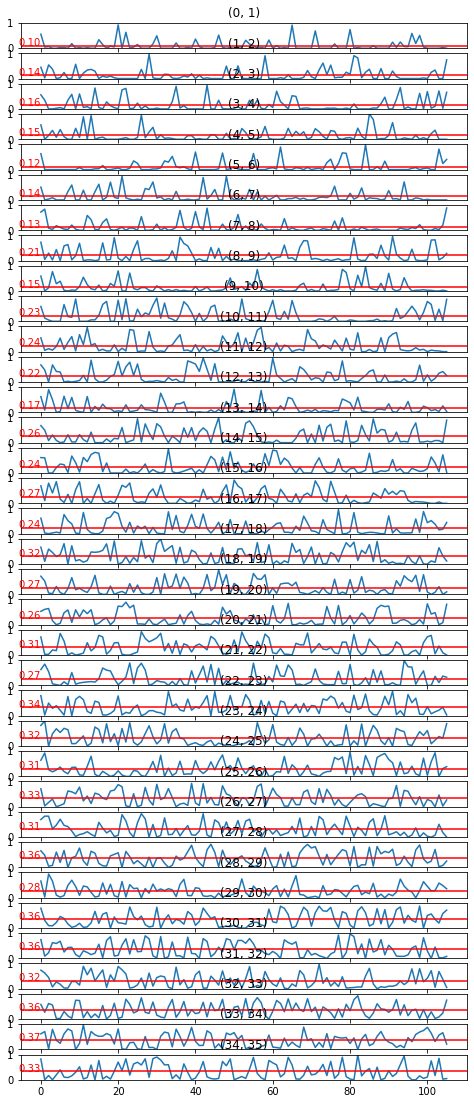

In [10]:
cols = 1
rows = 36
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Generate plots of temperature vs iteration for each of the 12 walkers

In [6]:
from perses.analysis.utils import open_netcdf
i = os.path.basename(os.path.dirname(out_dir))
nc = open_netcdf(os.path.join(out_dir, '36_replicas_working', f"{i}_{phase}_{aa}_{length}.nc"))
nc_checkpoint = open_netcdf(os.path.join(out_dir, '36_replicas_working', f"{i}_{phase}_{aa}_{length}_checkpoint.nc"))
checkpoint_interval = nc_checkpoint.CheckpointInterval
all_positions = nc_checkpoint.variables['positions']
n_iter, n_replicas, n_atoms, _ = np.shape(all_positions)



In [7]:
replica_trajs = []
for i in tqdm.tqdm(range(36)):
    replica_traj = []
    for iteration in range(n_iter):
        replica_traj.append(nc.variables['states'][iteration][i])
    replica_trajs.append(replica_traj)

100%|█| 36/36 [00:00<


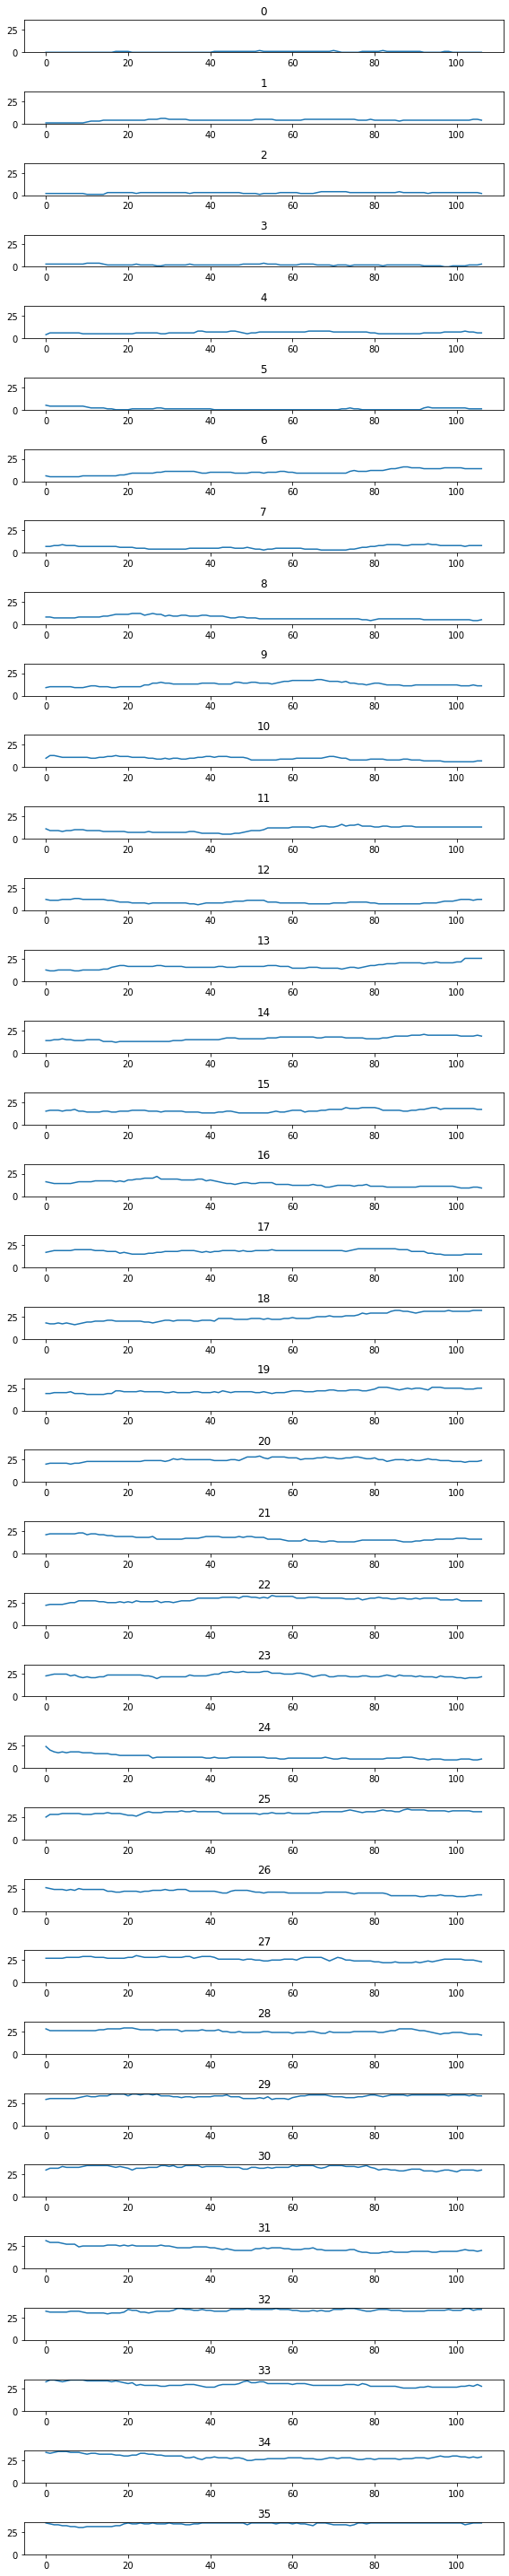

In [10]:
cols = 1
rows = 36
plt.figure(figsize=(8, 40))
gs = plt.GridSpec(rows, cols)
for i, replica_traj in enumerate(replica_trajs):
    plt.subplot(gs[i,0])
    plt.plot(replica_traj)
    plt.title(i)
    plt.ylim([0, 36])

plt.tight_layout()
plt.show()

## N501 14/147 with 48 replicas

### Load nc file

In [2]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/14/147/"
i = 147
phase = 'complex'
endstate = 0
aa = 'ASN'.lower()
length = '1ns'
with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)


In [4]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


DEBUG:openmmtools.multistate.multistatereporter:Initial checkpoint file automatically chosen as /data/chodera/zhangi/perses_benchmark/neq/14/147/147_complex_asn_1ns_checkpoint.nc
DEBUG:openmmtools.multistate.multistatereporter:checkpoint_interval != on-file checkpoint interval! Using on file analysis interval of 1.


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [5]:
states = range(48)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [6]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 579):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|█| 47/4


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: sc

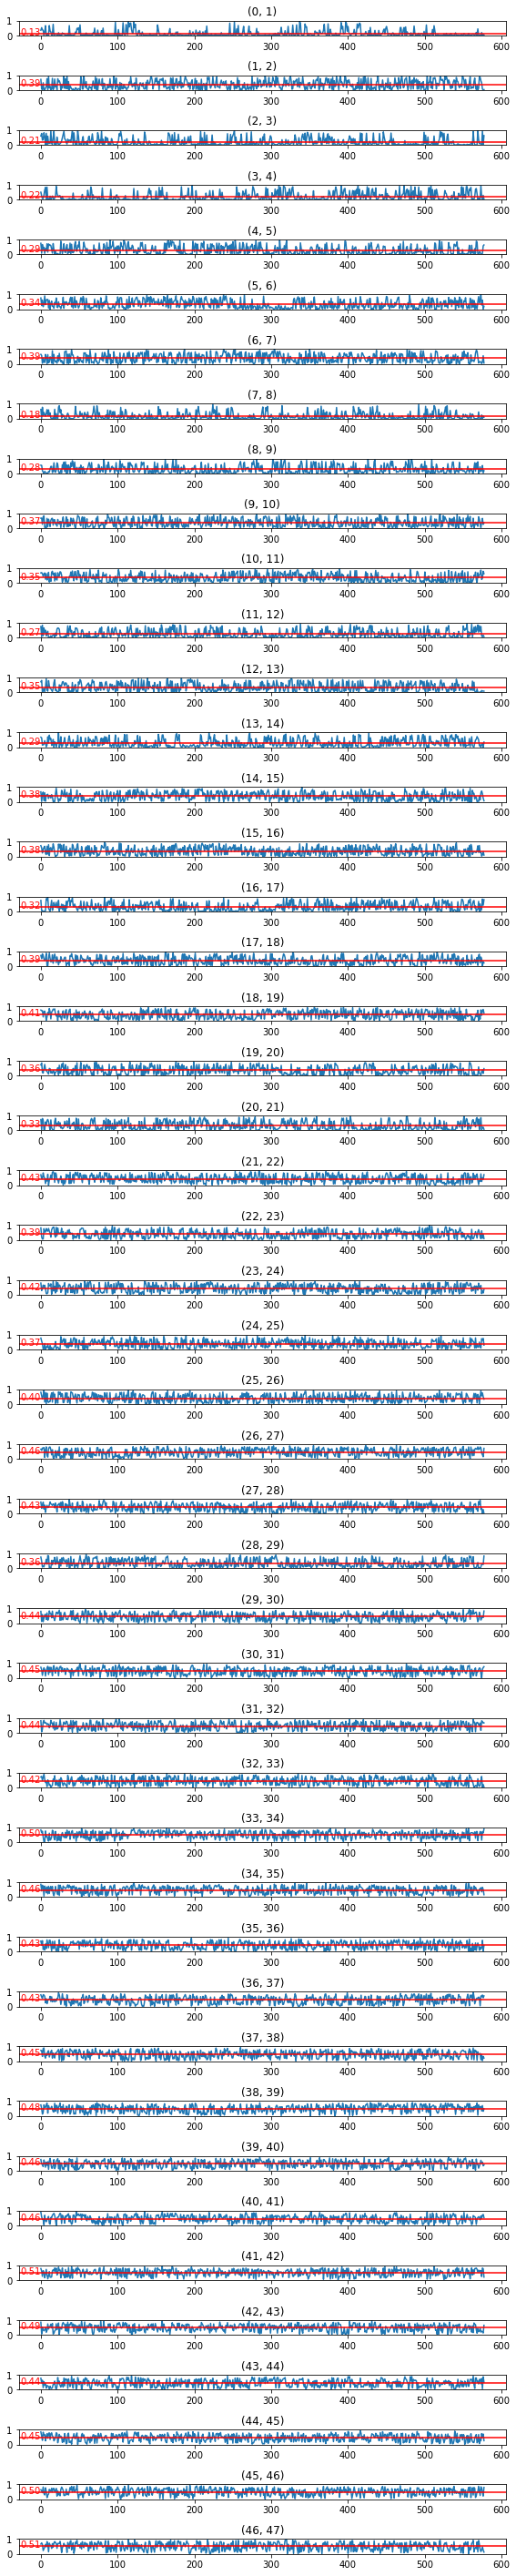

In [7]:
cols = 1
rows = 48
plt.figure(figsize=(8, 40))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Generate plots of temperature vs iteration for each of the 48 walkers

In [8]:
from perses.analysis.utils import open_netcdf
i = os.path.basename(os.path.dirname(out_dir))
nc = open_netcdf(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"))
nc_checkpoint = open_netcdf(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}_checkpoint.nc"))
checkpoint_interval = nc_checkpoint.CheckpointInterval
all_positions = nc_checkpoint.variables['positions']
n_iter, n_replicas, n_atoms, _ = np.shape(all_positions)



In [9]:
replica_trajs = []
for i in tqdm.tqdm(range(48)):
    replica_traj = []
    for iteration in range(n_iter):
        replica_traj.append(nc.variables['states'][iteration][i])
    replica_trajs.append(replica_traj)

100%|█| 48/4


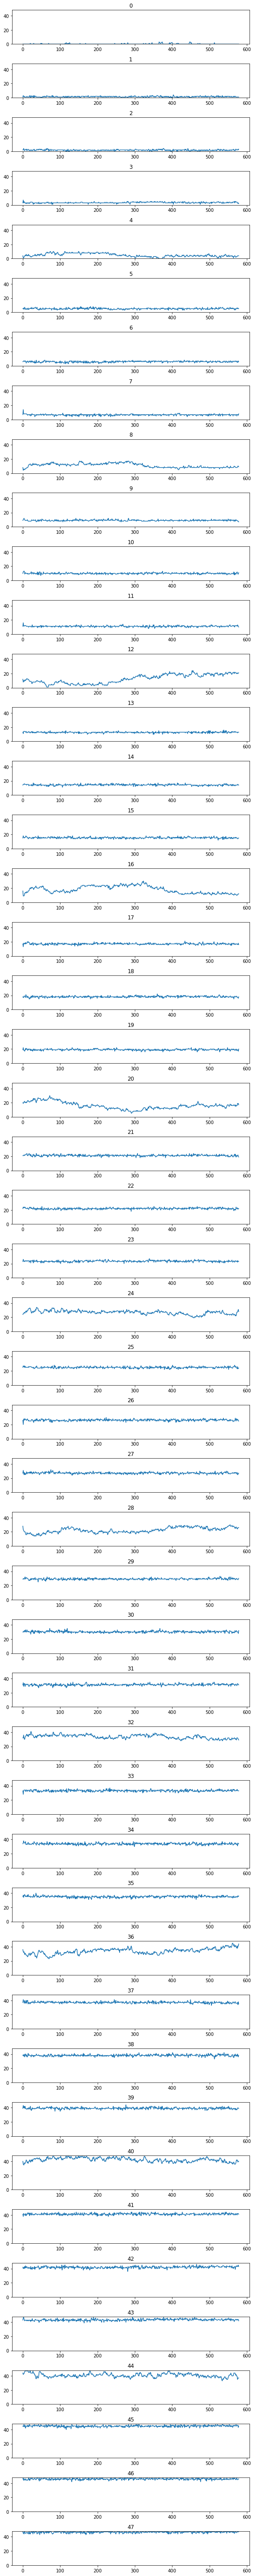

In [12]:
cols = 1
rows = 48
plt.figure(figsize=(8, 80))
gs = plt.GridSpec(rows, cols)
for i, replica_traj in enumerate(replica_trajs):
    plt.subplot(gs[i,0])
    plt.plot(replica_traj)
    plt.title(i)
    plt.ylim([0, 48])

plt.tight_layout()
plt.show()

In [1]:
import math

In [2]:
T_min = 300
T_max = 1200
n_replicas = 48
temperatures = [T_min + (T_max - T_min) * (math.exp(float(i) / float(n_replicas-1)) - 1.0) / (math.e - 1.0)
                for i in range(n_replicas)]

In [3]:
temperatures

[300.0,
 311.26363581392656,
 322.7694911192506,
 334.5227747386811,
 346.5288075083487,
 358.7930246866042,
 371.3209784146187,
 384.1183402298957,
 397.1909036338367,
 410.54458671452096,
 424.1854348258863,
 438.11962332452504,
 452.35346036533394,
 466.8933897572819,
 481.74599388059136,
 496.9179966666513,
 512.4162666420123,
 528.2478200378414,
 544.4198239662445,
 560.9395996648936,
 577.8146258114292,
 595.0525419091366,
 612.6611517454304,
 630.6484269247114,
 649.0225104771969,
 667.7917205453564,
 686.9645541496233,
 706.5496910350857,
 726.5559976008997,
 746.9925309142016,
 767.8685428103386,
 789.1934840812728,
 810.9770087540551,
 833.228978461305,
 855.9594669056771,
 879.178764420332,
 902.8973826274809,
 927.1260591971063,
 951.8757627080214,
 977.1576976134602,
 1002.983309313453,
 1029.3642893362805,
 1056.3125806313524,
 1083.8403829759075,
 1111.9601584979814,
 1140.684637318146,
 1170.026823312567,
 1200.0]